> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

In [ ]:
import imageio 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Read the video

With the `get_reader()` method of `imageio`, you can read a video from its source into a _Reader_ object. You don't need to worry too much about the technicalities here—you'll walk you through it all—but check the type, the length (for a video, that's number of frames), and notice you can get info, like the frames-per-second, using `get_meta_data()`.

In [1]:
# reader = imageio.get_reader('https://go.gwu.edu/engcomp3vidmit', format='mp4')
# ! conda install youtube-dl -y
# ! youtube-dl "https://youtu.be/ZsjyLPvFuaM?t=601"
! youtube-dl "https://youtu.be/D5QOScYHFUA"

/bin/bash: youtube-dl: command not found


In [ ]:
# reader = imageio.get_reader('https://go.gwu.edu/engcomp3vidmit', format='mp4')
reader = imageio.get_reader('./Breaststroke Pullout-D5QOScYHFUA.mp4', format='mp4')

In [ ]:
type(reader)

imageio.plugins.ffmpeg.FfmpegFormat.Reader

In [ ]:
fps = reader.get_meta_data()['fps']
print(fps)

29.97


### Show a video frame in an interactive figure

With `imageio`, you can grab one frame of the video, and then use `pyplot` to show it as an image. But you want to interact with the image, somehow.

So far in this course, you have used the command `%matplotlib inline` to get our plots rendered _inline_ in a Jupyter notebook. There is an alternative command that gives you some interactivity on the figures: `%matplotlib notebook`. Execute this now, and you'll see what it does below, when you show the image in a new figure.

Let's also set some font parameters for our plots in this notebook.

In [ ]:
%matplotlib notebook

Now you can use the `get_data()` method on the `imageio` _Reader_ object, to grab one of the video frames, passing the frame number. Below, you use it to grab frame number 1100, and then print the `shape` attribute to see that it's an "array-like" object with three dimensions: they are the pixel numbers in the horizontal and vertical directions, and the number of colors (3 colors in RGB format). Check the type to see that it's an `imageio` _Image_ object.

### Capture mouse clicks on the frame

Okay! Here is where things get really interesting. Matplotlib has the ability to create [event connections](https://matplotlib.org/devdocs/users/event_handling.html?highlight=mpl_connect), that is, connect the figure canvas to user-interface events on it, like mouse clicks. 

To use this ability, you write a function with the events you want to capture, and then connect this function to the Matplotlib "event manager" using [`mpl_connect()`](https://matplotlib.org/devdocs/api/backend_bases_api.html#matplotlib.backend_bases.FigureCanvasBase.mpl_connect). In this case, you connect the `'button_press_event'` to the function named `onclick()`, which captures the $(x,y)$ coordinates of the mouse click on the figure. Magic!

## Click on one frame to get pixel information

Use these two cells to get pixel information from a single video frame _in this case, frame 1100_

In [ ]:
image = reader.get_data(1100)
image.shape

(480, 854, 3)

In [ ]:
def onclick(event):
    '''Capture the x,y coordinates of a mouse click on the image'''
    ix, iy = event.xdata, event.ydata
    coords.append([ix, iy]) 

<IPython.core.display.Javascript object>


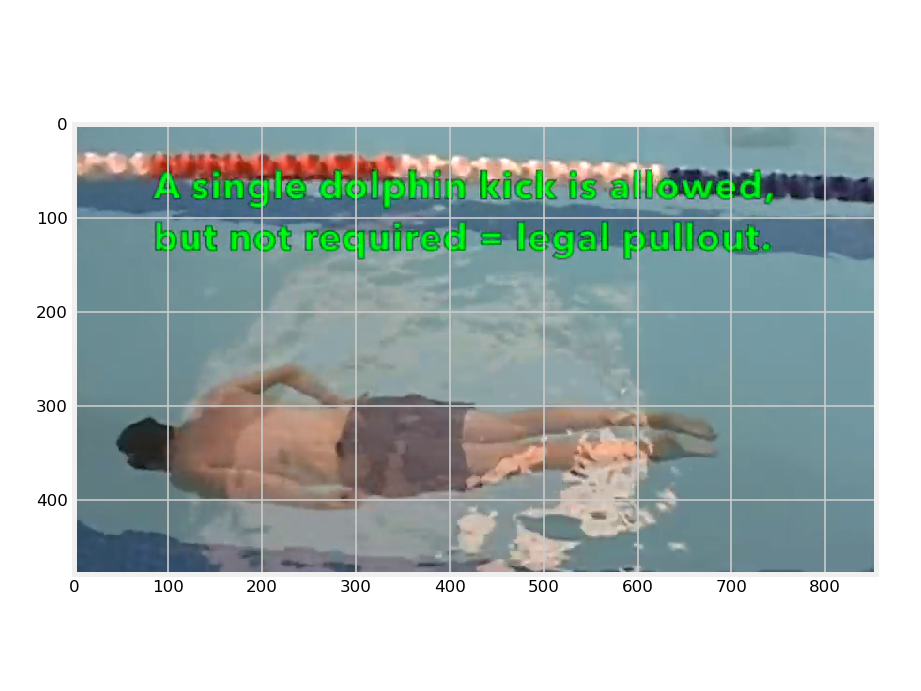

In [ ]:
fig = plt.figure()
plt.imshow(image, interpolation='nearest')

coords = []
connectId = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
coords

[[348.48252539799137, 308.59608008943746],
 [475.78496792672706, 322.39995939978235],
 [635.2964621796007, 317.7986662963341]]

### Capture mouse clicks on many frames with a widget

Capture the coordinates of mouse clicks on a _sequence_ of images, so
that you may have the positions of the moving ball caught on video. We
know how to capture the coordinates of mouse clicks, so the next
challenge is to get consecutive frames of the video displayed for us, to
click on the ball position each time. 

Widgets to the rescue! There are currently [10 different widget types](http://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html) included in the `ipywidgets` library. The `BoundedIntText()` widget shows a text box with an integer value that can be stepped from a minimum to a maximum value by clicking up/down arrows. Stepping through frames with this widget, and clicking on the ball position each time, gets us what you want.

Digitizing the ball positions in this way is a bit tedious. But this could be a realistic scenario: you captured video of a moving object, and you need to get position data from the video frames. Unless you have some fancy motion-capture equipment, this will do the trick.

Let's load the Jupyter widgets:

In [ ]:
from ipywidgets import widgets

Download the video, previously converted to .mp4 format to be read by `imageio`, and then load it to an `imageio` _Reader_. Notice that it has 3531 frames, and they are 720x1280 pixels in size. 

Below, you're showing frame number 52, which you found to be the start of the portion shown at 50% speed. Go ahead and use that frame to capture mouse clicks on the intersection of several $10\rm{cm}$ lines with one vertical, so you can calculate the scaling from pixels to physical distance.

In [ ]:
reader = imageio.get_reader('Breaststroke Pullout-D5QOScYHFUA.mp4')

In [ ]:
# how many frames are in the video

reader.count_frames()

6517

In [ ]:
reader.get_meta_data()

{'plugin': 'ffmpeg',
 'nframes': inf,
 'ffmpeg_version': '4.2.2-static https://johnvansickle.com/ffmpeg/ built with gcc 8 (Debian 8.3.0-6)',
 'codec': 'h264',
 'pix_fmt': 'yuv420p',
 'audio_codec': 'aac',
 'fps': 29.97,
 'source_size': (854, 480),
 'size': (854, 480),
 'rotate': 0,
 'duration': 217.5}

<IPython.core.display.Javascript object>


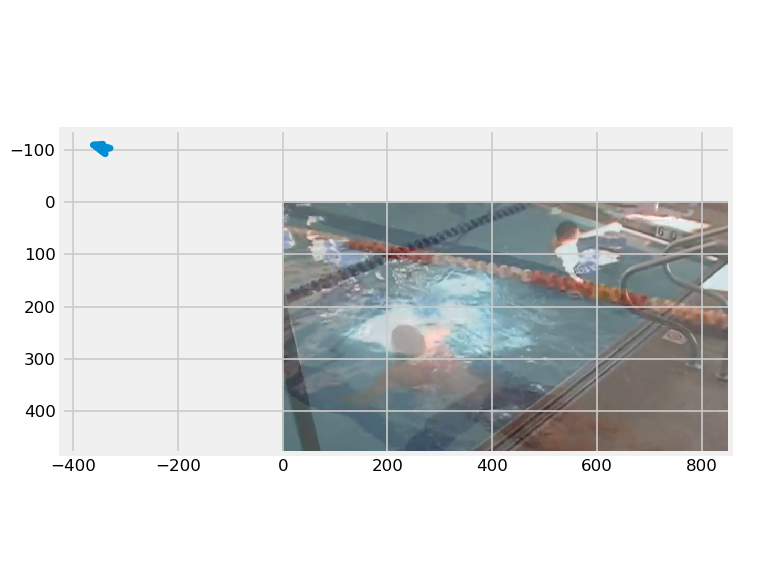

interactive(children=(BoundedIntText(value=6000, description='Frame:', max=6500, min=6000), Output()), _dom_cl…

In [ ]:
# USe the `selector min and max to set time frames

selector = widgets.BoundedIntText(value=6000, min=6000, max=6500, step=1,
    description='Frame:',
    disabled=False)

coords = []

def catchclick(frame):
    image = reader.get_data(frame)
    plt.imshow(image, interpolation='nearest');


fig = plt.figure()

connectId = fig.canvas.mpl_connect('button_press_event',onclick)

widgets.interact(catchclick, frame=selector);

In [ ]:
coords # view the pixel coordinates of the projectile


[[774.869019650865, 453.43456345042966],
 [767.2001978117845, 445.7657416113492],
 [774.869019650865, 454.9683278182457],
 [764.1326690761523, 454.9683278182457],
 [754.9300828692559, 456.50209218606176],
 [756.4638472370718, 461.1033852895101],
 [765.6664334439685, 468.77220712859054],
 [742.6599679267271, 470.30597149640664],
 [750.3287897658075, 476.441028967671],
 [748.7950253979914, 476.441028967671],
 [741.1262035589109, 477.9747933354871],
 [748.7950253979914, 477.9747933354871]]

In [ ]:
hip_coords = np.array([[426.70450815661206, 353.7398795423836],
 [428.2382725244282, 353.7398795423836],
 [417.50192194971555, 349.1385864389353],
 [419.0356863175316, 352.20611517456757],
 [425.170743788796, 353.7398795423836],
 [412.9006288462673, 355.27364391019967],
 [403.6980426393708, 359.87493701364804],
 [399.0967495359224, 359.87493701364804],
 [405.23180700718683, 372.1450519561767]])
ankle_coords = np.array([[774.869019650865, 453.43456345042966],
 [767.2001978117845, 445.7657416113492],
 [774.869019650865, 454.9683278182457],
 [764.1326690761523, 454.9683278182457],
 [754.9300828692559, 456.50209218606176],
 [756.4638472370718, 461.1033852895101],
 [765.6664334439685, 468.77220712859054],
 [742.6599679267271, 470.30597149640664],
 [750.3287897658075, 476.441028967671]])

<IPython.core.display.Javascript object>


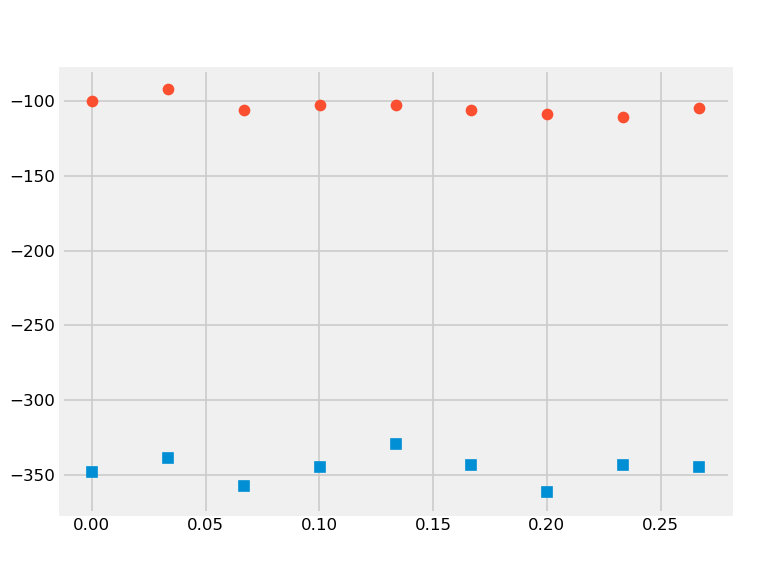

In [ ]:
ankle_position = hip_coords - ankle_coords

plt.figure();
t = np.arange(0, len(ankle_position))*1/29.97
plt.plot(t, ankle_position[:, 0], 's')
plt.plot(t, ankle_position[:, 1], 'o')

## What you've learned

* Work with images and videos in Python using `imageio`.
* Get interactive figures using the `%matplotlib notebook` command.
* Capture mouse clicks with Matplotlib's `mpl_connect()`.
* Observed acceleration of falling bodies is less than $9.8\rm{m/s}^2$.
* Capture mouse clicks on several video frames using widgets!
* Projectile motion is like falling under gravity, plus a horizontal velocity.
* Save our hard work as a numpy .npz file __Check the Problems for loading it back into your session__
* Compute numerical derivatives using differences via array slicing.
* Real data shows free-fall acceleration decreases in magnitude from $9.8\rm{m/s}^2$.